In [1]:
import numpy as np
import matplotlib.pyplot as plt
import frgtools.misc as frgm
import frgtools.xrd as xrd
import os

2.0
1.0
0.0
0.0
5.0
0.0


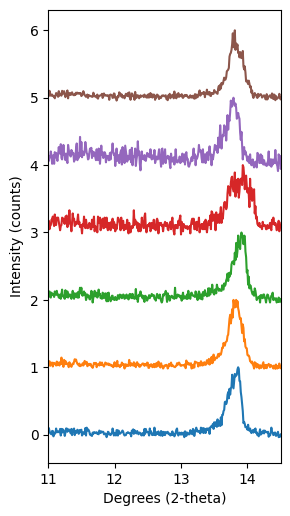

In [10]:
datafolder = 'C:\\Users\\seand\\OneDrive\\Documents\\XTAL\\x20220721_FAPbI3\\XRD\\'

# file/sample names
prefix = ''
antisolvents = ['CB','MeOAc','Tol','CB_Formic','Tol_Formic','MeOAc_Formic']
conditions = ['']
extension = '.ras'

# build antisolvent names and paths / AKA group 1
antisolvent_names = []
antisolvent_paths = []
for antisolvent in antisolvents:
        for condition in conditions:
            antisolvent_paths.append(prefix + datafolder + antisolvent + condition + extension)
            antisolvent_names.append(antisolvent + condition)

# load into matrix
data = {}
for idx in range(len(antisolvent_paths)):
    path = antisolvent_paths[idx]
    name = antisolvent_names[idx]
    
    temp = xrd.load_smartlab(path)
    data[name] = {
        'angles' : temp['angles'],
        'counts' : temp['counts'],
    }


# normalize everything & offset
for idx in range(len(antisolvent_names)):
    name = antisolvent_names[idx]
    print(np.min(data[name]['counts']))
    data[name]['norm_counts'] = data[name]['counts']
    data[name]['norm_counts'] = data[name]['norm_counts'] - np.average(data[name]['norm_counts'])
    data[name]['norm_counts'] = data[name]['norm_counts'] / np.max(data[name]['norm_counts'])
    data[name]['norm_counts'] = data[name]['norm_counts'] +idx


# plot everything
fig, ax = plt.subplots(1)
for item in antisolvent_names:
    # mask = data[item]['angles'] <= 15.0
    ax.plot(data[item]['angles'], data[item]['norm_counts'], label=item)
    
ax.set_ylabel('Intensity (counts)')
ax.set_xlabel('Degrees (2-theta)')
fig.set_size_inches(3.0, 6.0)
fig.set_dpi(100)
ax.set_xlim([11, 14.5])
#ax.legend()

plt.rcParams['font.size'] = 10

fig.savefig(os.path.join(datafolder, 'XRD_Summary' + '.png'), dpi = 400, bbox_inches='tight')



In [ ]:
L_No_SAM = 'C:\\Users\\seand\\OneDrive\\Documents\\SCALE\\20220601_FAPbI3_films_fto\\no_SAM.ras'
L_SAM = 'C:\\Users\\seand\\OneDrive\\Documents\\SCALE\\20220601_FAPbI3_films_fto\\with_SAM.ras'

No_SAM = xrd.load_smartlab(L_No_SAM)
With_SAM = xrd.load_smartlab(L_SAM)

fig, ax = plt.subplots(1)
ax.plot(No_SAM['angles'], No_SAM['counts'], label = 'FTO')
#ax.plot(With_SAM['angles'], With_SAM['counts'], label = 'FTO/2PAC')#+800
#ax.legend()
ax.set_ylabel('Intensity (counts)')
ax.set_xlabel('Degrees (2 theta)')

plt.rcParams['font.size'] = 12
fig.set_size_inches(3, 2)
fig.set_dpi(100)

